# Home Assignment 1: Deep Learning from Scratch

**Authors:** Yoav Elem and Amir Solimani

## Introduction

In this assignment, we will be implementing deep learning algorithms from scratch. Before we begin, let's set up our environment by downloading the necessary packages and performing the required imports.

In [1]:
!pip install -r requirements.txt

In [3]:
from layers import ReLULayer, TanhLayer, ResidualTanhLayer
from losses import LinearLayer, SoftmaxLayer
from neural_network import GenericNetwork
from utils import plot_loss_and_accuracy, plot_data, SGD, Gradient_test, JacobianTest, JacobianTransposeTest, NetworkGradientTest

import numpy as np
import matplotlib.pyplot as plt
import scipy.io


# Set numpy print options
np.set_printoptions(precision=10, suppress=True)

# Load the datasets
swiss_roll =scipy.io.loadmat('HW1_Data(1)/SwissRollData.mat')
peaks =scipy.io.loadmat('HW1_Data(1)/PeaksData.mat')
gmm = scipy.io.loadmat('HW1_Data(1)/GMMData.mat')
sample_data = scipy.io.loadmat('HW1_Data(1)/SampleData.mat')

## 2.1.1 Softmax Layer and Gradient Test

In this section, we created the softmax loss layer. The code for the implementation of the layer and the gradient test can be found [here](losses.py#L4).

We will now demonstrate that the layer passes the gradient test.

More specifically, we will generate a random vector $ \mathbf{d} $ where $ \|\mathbf{d}\| = 1 $. We will test the following:

- **First Order Error**: $ \|\text{softmax}(\mathbf{x} + \epsilon \mathbf{d}) - \text{softmax}(\mathbf{x})\| $

- **Second Order Error**: $ \|\text{softmax}(\mathbf{x} + \epsilon \mathbf{d}) - \text{softmax}(\mathbf{x}) - \epsilon \mathbf{d}^\top \nabla_\mathbf{x} \text{softmax}(\mathbf{x})\| $

The decay of epsilon is defined by the formula: $ \epsilon_t = 0.5^t $. In our plots, the x-axis represents the value of $ t $, and the y-axis shows the error measured in both first and second order errors.
note that the errors are presented in log-scale

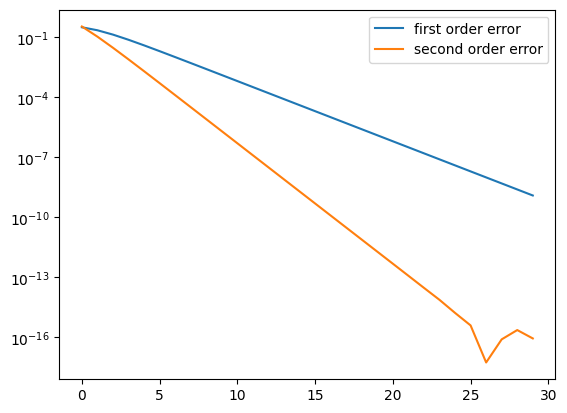

In [4]:
softmax_layer = SoftmaxLayer(4, 4)
x = np.random.rand(4, 1)
y = np.array([[0, 0, 1, 0]]).T

# Tests the gradient of the softmax layer as presented in the notes
Gradient_test(softmax_layer, x, y)

# 2.1.2 Minimizing an SGD Objective Function

## Overview
In this task, we delve into the implementation and application of Stochastic Gradient Descent (SGD) for optimizing a specific objective function. The goal is to demonstrate the effectiveness of SGD in practical scenarios.

## Task Description
We will be coding an SGD algorithm and showcasing its operational success. As recommended in our class, the approach involves creating a linear classifier that aims to approximate the identity function. This is formulated as:

$$
Wx + b = x
$$

Here, $x$ is a randomly sampled vector, and we seek to find the weights $W$ and bias $b$ such that the output mirrors the identity function. The key component of this task is the utilization of a linear layer, which is intricately linked with a loss function, thereby classifying it as a loss layer.

The SGD optimization will be performed with a learning rate $\text{lr} = 5 \times 10^{-3}$, adhering to the SGD methodology presented in class. 

For details on the implementation of the SGD function, please refer to [this link](utils.py#L26). We will be using a neural network model, as outlined [here](neural_network.py#L10). The generic SGD we created is designed to operate within a neural network context, but for this task, we will configure it as a single-layer linear neural network. This adaptation makes it perfectly suitable for our objective of approximating the identity function.


Epoch 0, training loss: 0.8608273253911456
Epoch 0, training accuracy: 0.0
Epoch 0, validation loss: 0.8608273253911456
Epoch 0, validation accuracy: 0.0
Epoch 1, training loss: 0.8300750383403512
Epoch 1, training accuracy: 0.0
Epoch 1, validation loss: 0.8300750383403512
Epoch 1, validation accuracy: 0.0
Epoch 2, training loss: 0.8004213492672928
Epoch 2, training accuracy: 0.0
Epoch 2, validation loss: 0.8004213492672928
Epoch 2, validation accuracy: 0.0
Epoch 3, training loss: 0.7718270117408124
Epoch 3, training accuracy: 0.0
Epoch 3, validation loss: 0.7718270117408124
Epoch 3, validation accuracy: 0.0
Epoch 4, training loss: 0.7442541813734386
Epoch 4, training accuracy: 0.0
Epoch 4, validation loss: 0.7442541813734386
Epoch 4, validation accuracy: 0.0
Epoch 5, training loss: 0.7176663657346283
Epoch 5, training accuracy: 0.0
Epoch 5, validation loss: 0.7176663657346283
Epoch 5, validation accuracy: 0.0
Epoch 6, training loss: 0.6920283760533142
Epoch 6, training accuracy: 0.0
E

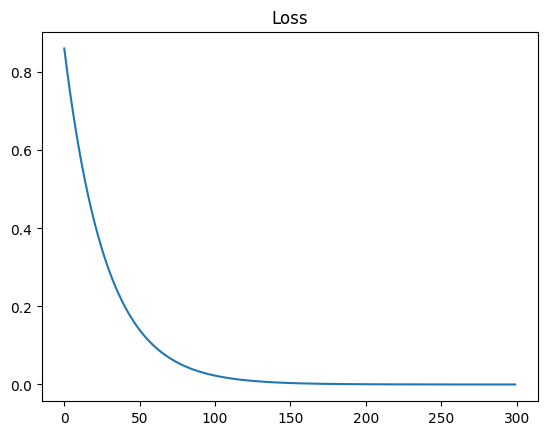

In [5]:
# define learning rate
lr = 5e-3

# generate a random input vector
x = np.random.rand(3, 1)

# define the target vector
y = x

# define the linear layer
linear_layer = GenericNetwork(LinearLayer(3, 3)) 

# Run the SGD algorithm
loss, _, _, _ = SGD(x, y, x, y, linear_layer, lr, epochs=300)

# plot the loss
plt.plot(loss)
plt.title('Loss')
plt.show()

### 2.1.3 Task Description

In this task, we are required to demonstrate the minimization of the softmax layer we created on a dataset using the SGD variant we developed. To do this, we created a sample dataset with the following characteristics:

- The datapoints are $(a, b)$ points on the plane, divided into 4 classes:
  - Class 0: if $a \ge 0$ and $b \ge 0$.
  - Class 1: if $a < 0$ and $b > 0$.
  - Class 2: if $a < 0$ and $b < 0$.
  - Class 3: if $a > 0$ and $b < 0$.

Since the softmax layer is a linear classifier, we had to ensure the dataset is linearly separable. To learn the dataset, we implemented the softmax layer. Note that we created a neural network with a single layer, which is the softmax layer, as our SGD implementation is designed to work on a network rather than an individual layer. In practice, there is no difference in computation.
We ran the experiment with 5 epochs on the dataset, each time experimenting with different mini-batch sizes and different learning rates. Below is a 3x3 table to be filled with the results:

| Learning Rate / Mini Batch Size | Size 16 | Size 64 | Size 256 |
|---------------------------------|--------|--------|---------|
| 5e-5                            |     0.75   |    0.59    |     0.61    |
| 5e-3                            |    0.998    |     0.997   |     0.991    |
| 5e-1                            |      0.989  |    0.991    |       0.996  |

The table shows the different accuracies measured at the end of the experiment on the validation set. As observed, the batch size did not have a significant impact. The learning rate of 5e-5 performed poorly, but this is attributed to the limited training duration of only 5 epochs, requiring more time to converge due to its small magnitude. The best result was obtained with a learning rate of 5e-3 and a mini-batch size of 16.


Epoch 0, training loss: 0.23707709979931604
Epoch 0, training accuracy: 0.9951
Epoch 0, validation loss: 0.23742739359788975
Epoch 0, validation accuracy: 0.9942
Epoch 1, training loss: 0.18558820513097252
Epoch 1, training accuracy: 0.995
Epoch 1, validation loss: 0.18628987970208513
Epoch 1, validation accuracy: 0.9958
Epoch 2, training loss: 0.16112729962696953
Epoch 2, training accuracy: 0.99775
Epoch 2, validation loss: 0.1616188369916311
Epoch 2, validation accuracy: 0.9984
Epoch 3, training loss: 0.14593551246012645
Epoch 3, training accuracy: 0.9982
Epoch 3, validation loss: 0.14630557378306083
Epoch 3, validation accuracy: 0.9988
Epoch 4, training loss: 0.13520210085361678
Epoch 4, training accuracy: 0.99655
Epoch 4, validation loss: 0.13577655388343005
Epoch 4, validation accuracy: 0.997


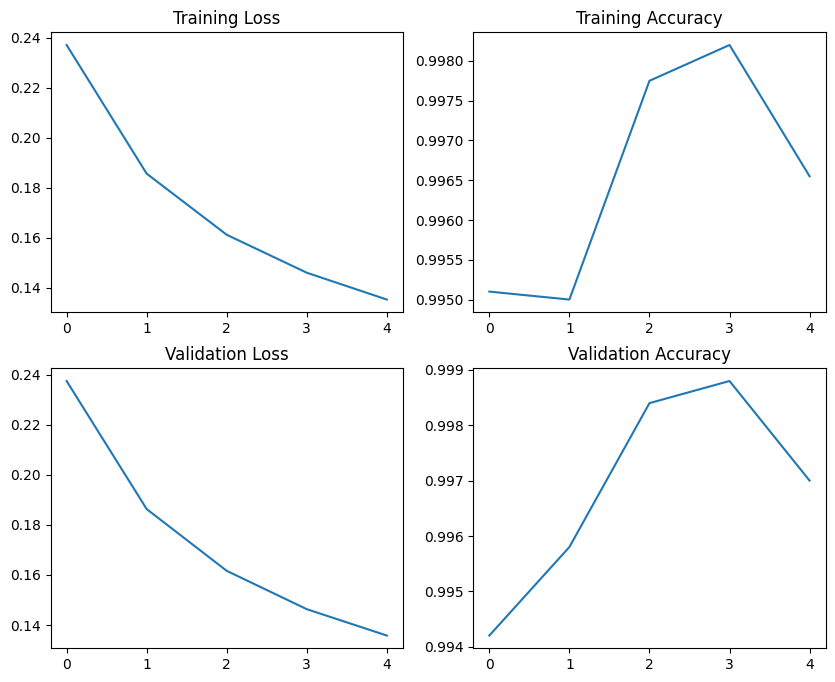

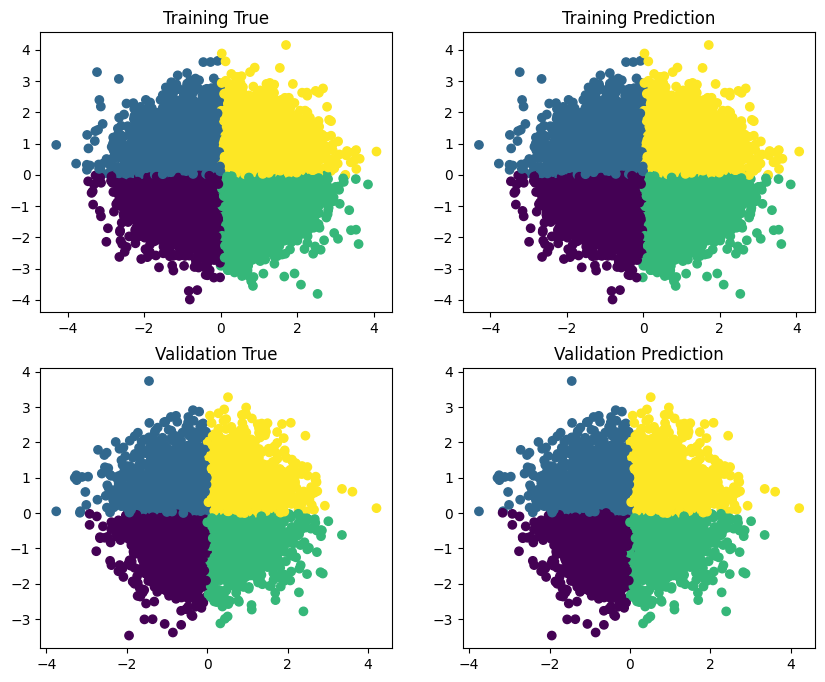

In [6]:
lr = 5e-3
batch_size = 16
dataset = sample_data

Xt = dataset['Yt']
Yt = dataset['Ct']
Xv = dataset['Yv']
Yv = dataset['Cv']

# define the network
network = GenericNetwork(SoftmaxLayer(2, 4))

# train the network
tloss, vloss, tacc, vacc = SGD(Xt, Yt, Xv, Yv, network, lr, epochs=5)

# plot the loss and accuracy
plot_loss_and_accuracy(tloss, tacc, vloss, vacc)
plot_data(network, Xt, Yt, Xv, Yv)


### Task 2.2.1

In this task, we are required to implement the neural network with the forward and backward pass. The code for the `GenericNetwork` class can be found [here](neural_network.py).
The class contains both the forward method that performs the forward pass, and the backward method that performs the backward pass.

To implement the backward pass, it was necessary to ensure that the output layer had methods for computing gradients, and that the hidden layers had "Jacobian transposed times vector" methods.

We have already verified that the loss layers pass the gradient test (back in 1.1.3). Now, we should perform two tests. The first is the `JacobianTest`, which checks that the Jacobians times vector methods of the layer are implemented correctly. Once we pass this test, we will conduct the `JacobiansTransposedTest` to ensure that the methods used in backpropagation work properly.

We will perform the tests on a tanh layer. The code for the tests themselves can be found [here](utils.py), and the code implementing the tanh layer can be found [here](layers.py).


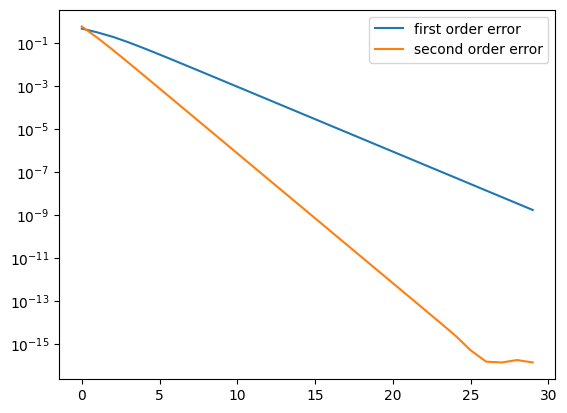

In [7]:
# in this part we do the jacobian test, the results of which are plotted below
tanh_layer = TanhLayer(2, 2)
x = np.random.rand(2, 1)
JacobianTest(tanh_layer, x)

In [8]:
# Now that we passed the Jacobian test, we will preform the Jacobian Transpose test
_, _, passed = JacobianTransposeTest(tanh_layer, x)
print("passed" if passed else "failed")

passed


### Task 2.2.2

For the Residual Network, We created a class for the residual hidden layer, the code of which can be found [here](layers.py)
In order to use it in a network, we will have to first have it pass the Jacobian Test, below we create such a network and run the test on it

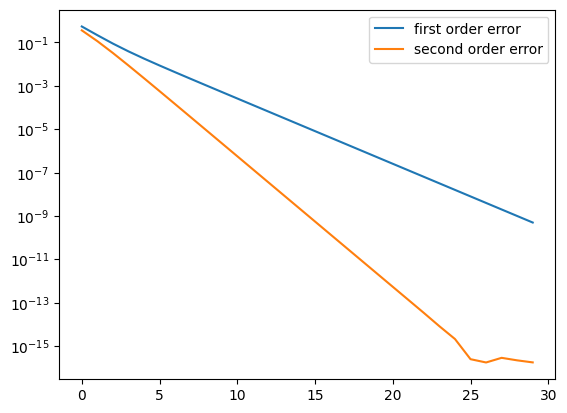

In [9]:
res_layer = ResidualTanhLayer(2, 2)
x = np.random.rand(2, 1)
JacobianTest(res_layer, x, residual=True)

### Task 2.2.3
In this task, we are required to implement a Gradient Test for the entire network, the code for the test is the function NetworkGradientTest and can be found[here](utils.py).
In order to create the gradient of the network, we used a similar idea to backpropigation, the code for the creation of the gradient of the entire network can be found [here](neural_network.py).

Blow we plot the results of the test on a big network, consisting of a few types of layers

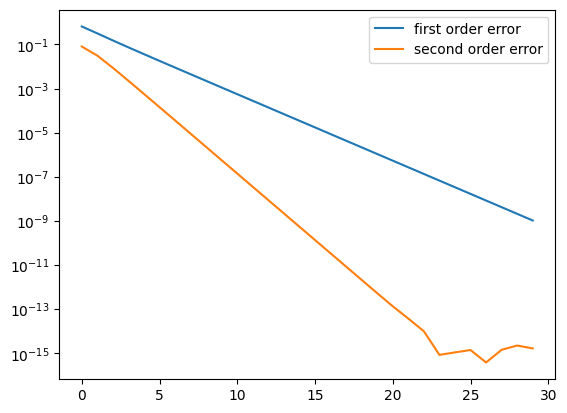

In [10]:
N = GenericNetwork(
                   layers=[
                            TanhLayer(2, 32), 
                            TanhLayer(32, 32),
                            TanhLayer(32, 2),
                        ],
                    output_layer= SoftmaxLayer(2, 4),
                )

x = np.random.rand(2, 1)
y = np.array([[0, 0, 1, 0]]).T

NetworkGradientTest(N, x, y)

Epoch 0, training loss: 10.337672275268963
Epoch 0, training accuracy: 0.67825
Epoch 0, validation loss: 10.328136306198742
Epoch 0, validation accuracy: 0.6722
Epoch 1, training loss: 6.286740367604525
Epoch 1, training accuracy: 0.6906
Epoch 1, validation loss: 6.044638448912732
Epoch 1, validation accuracy: 0.6954
Epoch 2, training loss: 4.644882668874109
Epoch 2, training accuracy: 0.7539
Epoch 2, validation loss: 4.500403832839952
Epoch 2, validation accuracy: 0.7592
Epoch 3, training loss: 12.745178314133046
Epoch 3, training accuracy: 0.60035
Epoch 3, validation loss: 12.49223912762493
Epoch 3, validation accuracy: 0.6126
Epoch 4, training loss: 8.76742641668123
Epoch 4, training accuracy: 0.65445
Epoch 4, validation loss: 8.633567633191493
Epoch 4, validation accuracy: 0.6548
Epoch 5, training loss: 17.53212865705852
Epoch 5, training accuracy: 0.5411
Epoch 5, validation loss: 17.470189089049253
Epoch 5, validation accuracy: 0.5348
Epoch 6, training loss: 4.386529539378947
Epoc

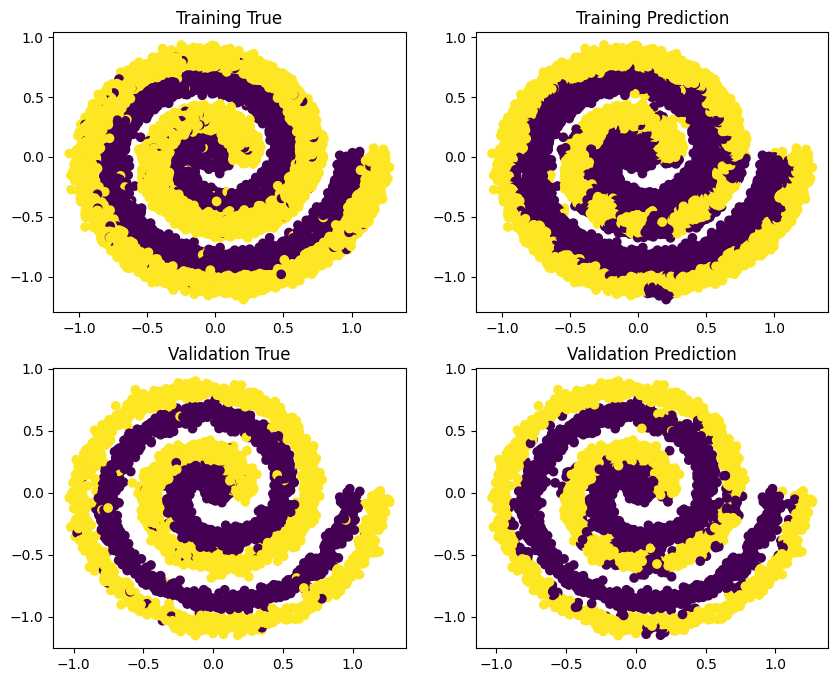

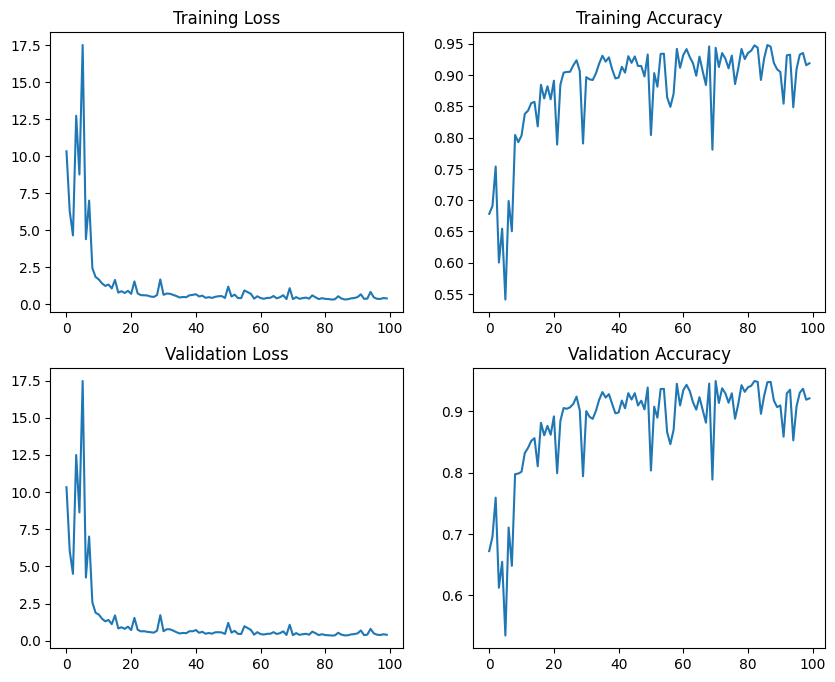

In [18]:
dataset = swiss_roll
Xt = dataset['Yt']
Yt = dataset['Ct']
Xv = dataset['Yv']
Yv = dataset['Cv']
lr = 5e-5

# lr 5e-3, 5e-5
# 2 layers, 4 width

network = GenericNetwork(
layers = [
    ReLULayer(2, 32),
    ReLULayer(32, 64),
    ReLULayer(64, 64),
    ReLULayer(64, 64)
],
output_layer= SoftmaxLayer(64, 2)
)

# train the network
tloss, vloss, tacc, vacc = SGD(Xt, Yt, Xv, Yv, network, lr, epochs=100, batch_size=16)
plot_data(network, Xt, Yt, Xv, Yv)
plot_loss_and_accuracy(tloss, tacc, vloss, vacc)


Epoch 0, training loss: 3.4818130358417996
Epoch 0, training accuracy: 0.73572
Epoch 0, validation loss: 3.7607832764607547
Epoch 0, validation accuracy: 0.73632
Epoch 1, training loss: 2.70739481540095
Epoch 1, training accuracy: 0.76124
Epoch 1, validation loss: 2.9124433482413727
Epoch 1, validation accuracy: 0.7696
Epoch 2, training loss: 2.2785537437703787
Epoch 2, training accuracy: 0.76712
Epoch 2, validation loss: 2.4367081938430566
Epoch 2, validation accuracy: 0.76864
Epoch 3, training loss: 1.9048141480343979
Epoch 3, training accuracy: 0.80088
Epoch 3, validation loss: 2.0406667516551096
Epoch 3, validation accuracy: 0.79824
Epoch 4, training loss: 1.7175774183267507
Epoch 4, training accuracy: 0.782
Epoch 4, validation loss: 1.7989256803451312
Epoch 4, validation accuracy: 0.78448
Epoch 5, training loss: 1.4928321712592472
Epoch 5, training accuracy: 0.80352
Epoch 5, validation loss: 1.5461616920029957
Epoch 5, validation accuracy: 0.80384
Epoch 6, training loss: 1.3254199

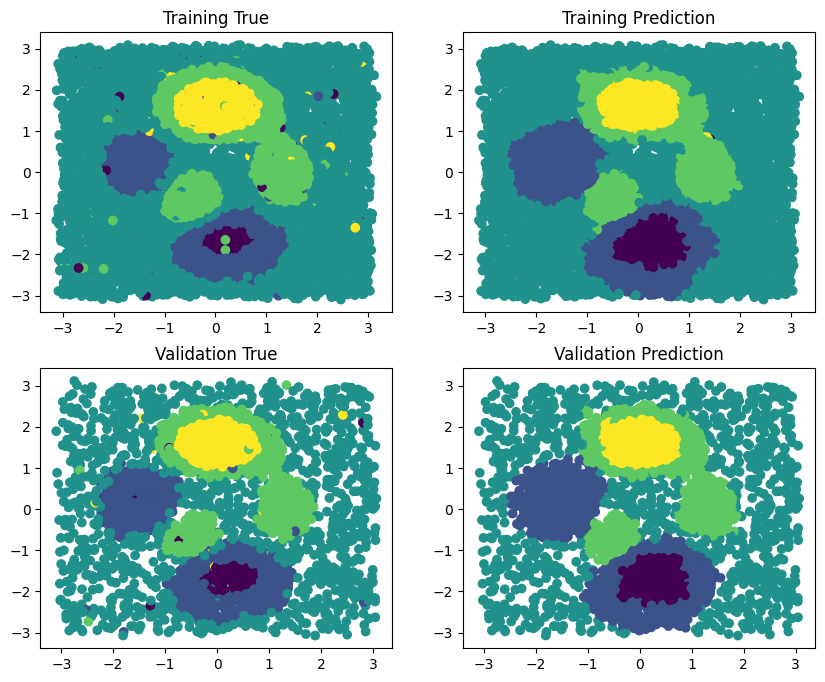

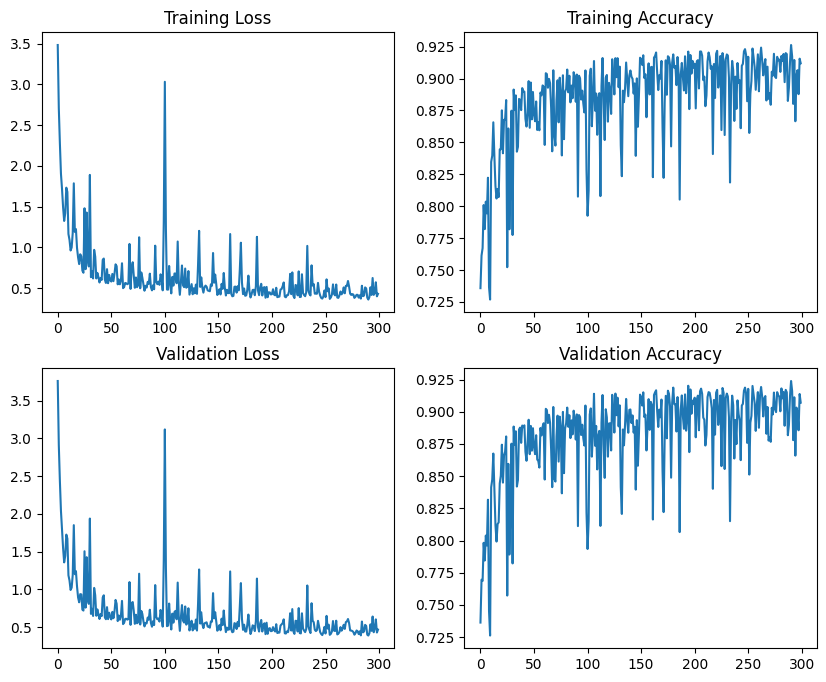

In [11]:
dataset = peaks
Xt = dataset['Yt']
Yt = dataset['Ct']
Xv = dataset['Yv']
Yv = dataset['Cv']
lr = 5e-5

network = GenericNetwork(
SoftmaxLayer(128, 5),
layers = [
    ReLULayer(2, 128),
    ReLULayer(128, 128)
],
)


# train the network
tloss, vloss, tacc, vacc = SGD(Xt, Yt, Xv, Yv, network, lr, epochs=300)
plot_data(network, Xt, Yt, Xv, Yv)
plot_loss_and_accuracy(tloss, tacc, vloss, vacc)

In [12]:
dataset = gmm
Xt = dataset['Yt']
Yt = dataset['Ct']
Xv = dataset['Yv']
Yv = dataset['Cv']
lr = 5e-5

network = GenericNetwork(
SoftmaxLayer(128, 5),
layers = [
    ReLULayer(5, 128),
    ReLULayer(128, 128)
],
)


# train the network
tloss, vloss, tacc, vacc = SGD(Xt, Yt, Xv, Yv, network, lr, epochs=300)

Epoch 0, training loss: 7.7533281709628294
Epoch 0, training accuracy: 0.51912
Epoch 0, validation loss: 7.731116851654911
Epoch 0, validation accuracy: 0.52832
Epoch 1, training loss: 3.4202834407164873
Epoch 1, training accuracy: 0.7108
Epoch 1, validation loss: 3.4298590521160066
Epoch 1, validation accuracy: 0.71456
Epoch 2, training loss: 2.4454753504119062
Epoch 2, training accuracy: 0.78148
Epoch 2, validation loss: 2.465932635491352
Epoch 2, validation accuracy: 0.7872
Epoch 3, training loss: 2.0047008911344006
Epoch 3, training accuracy: 0.81992
Epoch 3, validation loss: 2.034121774778183
Epoch 3, validation accuracy: 0.82512
Epoch 4, training loss: 1.7823713939168577
Epoch 4, training accuracy: 0.84028
Epoch 4, validation loss: 1.833103949607265
Epoch 4, validation accuracy: 0.84112
Epoch 5, training loss: 1.638534052652636
Epoch 5, training accuracy: 0.85852
Epoch 5, validation loss: 1.6740802557008927
Epoch 5, validation accuracy: 0.8592
Epoch 6, training loss: 1.4826485242

2.2.5

In [50]:
dataset = swiss_roll
Xt = dataset['Yt'][:200]
Yt = dataset['Ct'][:200]
Xv = dataset['Yv']
Yv = dataset['Cv']
lr = 5e-5

network = GenericNetwork(
SoftmaxLayer(64, 2),
layers = [
    TanhLayer(2, 16),
    TanhLayer(16, 64)
],
)

# train the network
tloss, vloss, tacc, vacc = SGD(Xt, Yt, Xv, Yv, network, lr, epochs=300)
plot_data(network, Xt, Yt, Xv, Yv)
plot_loss_and_accuracy(tloss, tacc, vloss, vacc)

Epoch 0, training loss: 1.5481690917494164
Epoch 0, training accuracy: 0.46855
Epoch 0, validation loss: 1.489863461963961
Epoch 0, validation accuracy: 0.4826
Epoch 1, training loss: 1.2022866795661296
Epoch 1, training accuracy: 0.46915
Epoch 1, validation loss: 1.1676667272420822
Epoch 1, validation accuracy: 0.4788
Epoch 2, training loss: 0.999614036161086
Epoch 2, training accuracy: 0.4876
Epoch 2, validation loss: 0.9808407083900361
Epoch 2, validation accuracy: 0.4984
Epoch 3, training loss: 0.8856900368675983
Epoch 3, training accuracy: 0.5426
Epoch 3, validation loss: 0.8717121448733509
Epoch 3, validation accuracy: 0.557
Epoch 4, training loss: 0.8243991692351811
Epoch 4, training accuracy: 0.5333
Epoch 4, validation loss: 0.8148585700991317
Epoch 4, validation accuracy: 0.542
Epoch 5, training loss: 0.7899640008062327
Epoch 5, training accuracy: 0.5225
Epoch 5, validation loss: 0.782250928073781
Epoch 5, validation accuracy: 0.5356
Epoch 6, training loss: 0.769067534987425
E

KeyboardInterrupt: 

Epoch 0, training loss: 4.148529596730603
Epoch 0, training accuracy: 0.64764
Epoch 0, validation loss: 4.117955838709945
Epoch 0, validation accuracy: 0.648


Epoch 1, training loss: 2.8104943596468557
Epoch 1, training accuracy: 0.73332
Epoch 1, validation loss: 2.852091130160967
Epoch 1, validation accuracy: 0.72704
Epoch 2, training loss: 2.2369883326187883
Epoch 2, training accuracy: 0.75964
Epoch 2, validation loss: 2.261915693910313
Epoch 2, validation accuracy: 0.75312
Epoch 3, training loss: 1.9650417685172092
Epoch 3, training accuracy: 0.76676
Epoch 3, validation loss: 1.9701192495936513
Epoch 3, validation accuracy: 0.76192
Epoch 4, training loss: 1.7928834106666094
Epoch 4, training accuracy: 0.78056
Epoch 4, validation loss: 1.7948927619589294
Epoch 4, validation accuracy: 0.7728
Epoch 5, training loss: 1.9202658148361855
Epoch 5, training accuracy: 0.67208
Epoch 5, validation loss: 1.8776037281326845
Epoch 5, validation accuracy: 0.67232
Epoch 6, training loss: 1.64587466620814
Epoch 6, training accuracy: 0.77948
Epoch 6, validation loss: 1.6285257999231064
Epoch 6, validation accuracy: 0.77616
Epoch 7, training loss: 1.4981908

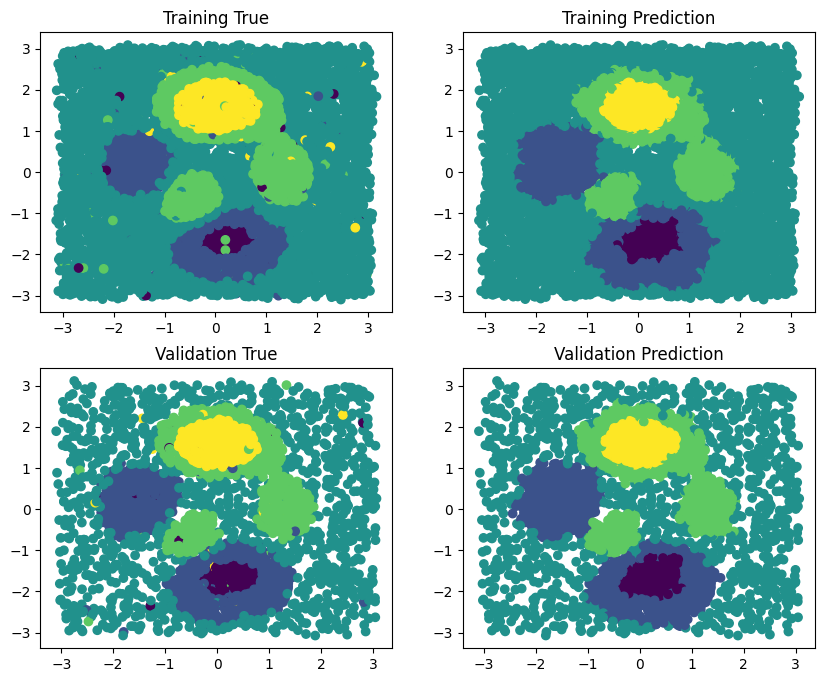

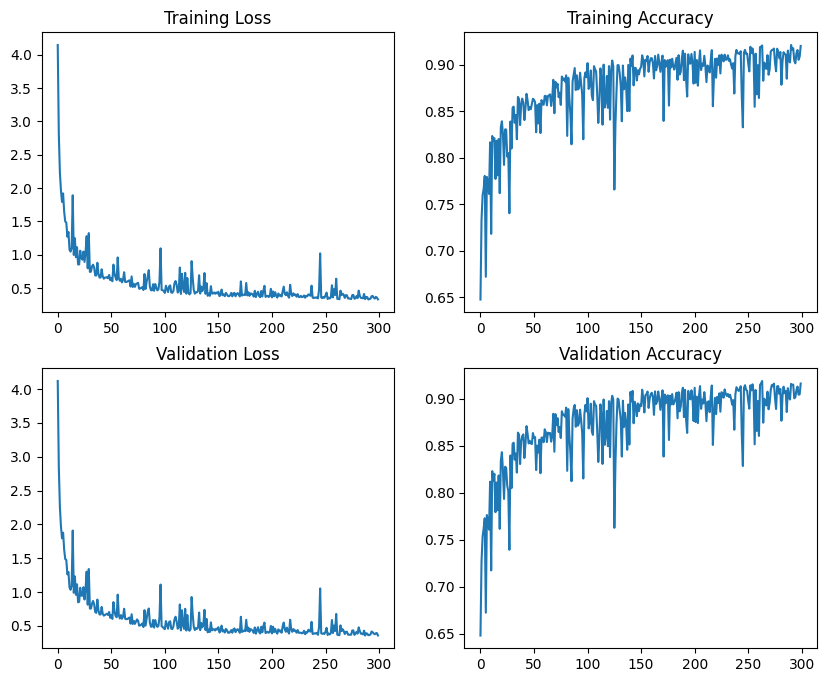

In [14]:
dataset = peaks
Xt = dataset['Yt']
Yt = dataset['Ct']
Xv = dataset['Yv']
Yv = dataset['Cv']
lr = 5e-5

network = GenericNetwork(
SoftmaxLayer(128, 5),
layers = [
    ReLULayer(2, 128),
    ReLULayer(128, 128)
],
)


# train the network
tloss, vloss, tacc, vacc = SGD(Xt, Yt, Xv, Yv, network, lr, epochs=300)
plot_data(network, Xt, Yt, Xv, Yv)
plot_loss_and_accuracy(tloss, tacc, vloss, vacc)

In [15]:
dataset = gmm
Xt = dataset['Yt']
Yt = dataset['Ct']
Xv = dataset['Yv']
Yv = dataset['Cv']
lr = 5e-5

network = GenericNetwork(
SoftmaxLayer(128, 5),
layers = [
    ReLULayer(5, 128),
    ReLULayer(128, 128)
],
)


# train the network
tloss, vloss, tacc, vacc = SGD(Xt, Yt, Xv, Yv, network, lr, epochs=300)

Epoch 0, training loss: 4.029325447599316
Epoch 0, training accuracy: 0.72224
Epoch 0, validation loss: 4.1125331475322495
Epoch 0, validation accuracy: 0.71744
Epoch 1, training loss: 2.3414835623201076
Epoch 1, training accuracy: 0.81532
Epoch 1, validation loss: 2.2960870036328
Epoch 1, validation accuracy: 0.8136
Epoch 2, training loss: 1.9213821800737836
Epoch 2, training accuracy: 0.85176
Epoch 2, validation loss: 1.8878743726420972
Epoch 2, validation accuracy: 0.8488
Epoch 3, training loss: 1.6581285641380958
Epoch 3, training accuracy: 0.86948
Epoch 3, validation loss: 1.627890408721263
Epoch 3, validation accuracy: 0.8688
Epoch 4, training loss: 1.4900854638514869
Epoch 4, training accuracy: 0.8836
Epoch 4, validation loss: 1.471734456903598
Epoch 4, validation accuracy: 0.88176
Epoch 5, training loss: 1.4214319953358017
Epoch 5, training accuracy: 0.89188
Epoch 5, validation loss: 1.3786995503492216
Epoch 5, validation accuracy: 0.89616
Epoch 6, training loss: 1.311026046763